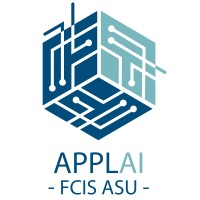

# **Introduction**

##**Points to be discussed**


1. What will we be using for deployment ?
2. Loading your model
3. Setting your page
4. Running your app on a local host
5. Running your app on a Global host 

# **1.What will we be using for deployment ?**

**We will be using streamlit for deployment it is free to use and we will be explaining all the steps needed to make your app live !**



![Streamlit](https://lh3.googleusercontent.com/-UU_-cM2FZnI/YLgc3z-EFCI/AAAAAAAAAuo/sORie7aJNgsM8UY7_qAUTZUSeSxKtA7UQCLcBGAsYHQ/s16000/streamlit_log.png)

**Note: We will have our deployment file as a python file not a notebook !**

**You may need this cheat sheet that have all the functions streamlit provide !**

[Streamlit's cheat sheet](https://docs.streamlit.io/library/cheatsheet)

# **2.Loading your model**


## 2.1 Loading Model By Joblib


### What is Joblib:
joblib is a set of tools to provide lightweight pipelining in Python. It focuses on disk-caching, memoization, and parallel computing. The library is optimized to be fast and robust on large data in particular and has specific optimizations for NumPy arrays.

In [ ]:
import joblib
joblibfile='My_file'
joblib.dump(modelname,joblibfile)

Here the Model named `modelname` will be saved in the file named `My file` 

In [ ]:
loaded_model = joblib.load(open("My_file", 'rb'))

Loading the saved model from the file by `joblib.load()`

## 2.2 Loading Model By Pickle


###What is Pickle
`pickle` is a module built-in in Python which allows for Python object serialization. “Pickling” is the process in which a Python object is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream is converted back into Python objects.

The name comes from the verb “to pickle”, which means “preserving vegetables for later use”: in the same way, Python objects are serialized into files for later use.

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('My_file', 'wb'))

In [ ]:
pickled_model = pickle.load(open('My_file', 'rb'))

### So, should I use pickle or joblib to save and load my machine learning models?

`joblib` is faster in saving/loading large NumPy arrays,

 whereas `pickle` is faster with large collections of Python objects. Therefore, if your model contains large NumPy arrays
 
(as the majority of models does), `joblib` should be faster.

# **3.Setting your page**

##*3.1 Importing streamlit*

**First we need to import streamlit as we will be using it as we said**

*Note first use `pip install streamlit` to install streamlit and `pip install streamlit_lottie` to install streamlit lottie*

In [ ]:
import streamlit as st
import requests
from streamlit_lottie import st_lottie
from PIL import Image

So what is each library from these for ?


*   Streamlit is for creating our web page (app) and it contains all the functions to set buttons or text boxes and more as we will see.

*   requests is for using urls to load anything into your app we will be using it later .

*  streamlit_lottie is for lottie files if you don't know what are lottie files it is more like an animation and we will see that later too .

*  Image is clear from it's name we use it to load photos into our app.



## *3.2 Displaying text*

Now after importing all our libraries let's add some text into our page we have many text formats but let's talk about the important ones you can **find the rest in the cheat sheet the link is provided in the first section.**

In [ ]:
st.title("My first App")

Title function is our very first thing that we will add to our web page and it clearly display the text that you gave to it as a title to your page

In [ ]:
st.header('My header')

header function takes a string and display it as a header

In [ ]:
st.subheader('My sub')

For subheader yes you guessed it right it displays the text as a subheader 

**Here is an example to see the difference between headers,subheaders and titles on the web page !**

![link text](https://i.ibb.co/VNPD53f/h-sh-t.png)

In [ ]:
st.text('This is Applai')

text function displays text as it is just the normal size

In [ ]:
st.latex(r''' e^{i\pi} + 1 = 0 ''')

latex function is mainly used for formulas or equations

In [ ]:
st.code('for i in range(8): foo()')

finally code function is to display the given text as a block of code and here is how the 3 functions output looks like on our web page

![link text](https://i.ibb.co/TP30V6G/imageew.png)

**That's it for the text formats there are more functions that you can use as we said look into the cheat sheet for more functions !**

## *3.3 Forms, columns, buttons and text boxes*

**The buttons, Text boxes are used inside a form shape and this form have columns we will talk about how to create a form and use the columns to put your buttons and text boxes !**

In [ ]:
with st.form(key="form1"):
    left_column,right_column = st.columns(2)
    with right_column:
        Name=st.text_input(label="Enter your name")
    with left_column:
        submit=st.form_submit_button(label="Submit your name")

*  So `with` keyword indicates the place that you are working on ⁉

*  to create a form we use `st.form` and we give the form a key or a name as in the example we created a form called `form1` and we used with to start designing it .

*  `left_column,right_column = st.columns(2)` this piece of code is to create two columns a right one and a left one to put our buttons , text boxes or whatever in.

*  then we used `with right_column:` to start putting something into our right column.

* `st.text_input` is used to create a text box we assign it into a variable so that the value written in the text box will be asigned to that variable and we give it a label to be displayed above the text box so here `Name` is the variable that the text will be asigned to .

* **Note: The value written in the text box is always a string so if you need it in mathmatical equation for example you will need type casting !**

* then we used `with left_column:` to start putting stuff into our left column.

* `st.form_submit_button` is used to create a button the variable here is a boolean it is equal to `1` if the button is pressed and equal to `0` if it is not and the function also has a label attribute and it is the label that will be displayed on the button.



**So here is the output for our code**

![Form](https://i.ibb.co/LvCrx4v/form.png)

## *3.4 Side Bar*

![image](https://docs.streamlit.io/images/api/sidebar.jpg)

- Sidebar is pinned to the left, allowing users to focus on the content in your app.
- Can be used to add options menu 
- Splitting your page to Home and About

###*Add Option Menu to Sidebar*
Let’s add a navigation menu to the sidebar using the `option_menu` function. Within the function, we need to specify a few parameters:

- `menu_title` (required): This is the title of the menu (‘App Gallery’). We can also hide the title by passing None to this parameter.
- `options` (required): This is the list of options to be displayed in the menu.
- `default_index` (optional): This parameter determines the default option to be selected in the menu. The default is 0, which is the first item in the options list.
- `menu_icon` and icons(optional): These are the names of the bootstrap-icons for the menu title and options in the menu. You can look up the names of the icons from bootstrap’s website.

![image](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*trg6qWUNkxFs4mz7syd8Eg.png)

- `orientation` (optional): We can choose to display the menu vertically or horizontally using this parameter. The default is ‘vertical’.
- `styles` (optional): This parameter allows you to customize the look and feel of the menu by adjusting the title size, icon color, icon font size, background color, etc.

In [ ]:
with st.sidebar:
    choose = option_menu("App Gallery", ["About", "Photo Editing", "Project Planning", "Python e-Course", "Contact"],
                         icons=['house', 'camera fill', 'kanban', 'book','person lines fill'],
                         menu_icon="app-indicator", default_index=0,
                         styles={
        "container": {"padding": "5!important", "background-color": "#fafafa"},
        "icon": {"color": "orange", "font-size": "25px"}, 
        "nav-link": {"font-size": "16px", "text-align": "left", "margin":"0px", "--hover-color": "#eee"},
        "nav-link-selected": {"background-color": "#02ab21"},
    }
    )

![image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*JhxsEUBNzTt2Gh_ba9nzsg.png)

###*Create App Pages*
We’ll create a separate app page for each option in the menu By checking the value of the variable `choose`.

We use if-elif statements to link each app page to the corresponding option in the menu.

In [ ]:
if choose == "About": #now im editing the About page
  #your page setting commands goes here

In [ ]:
elif choose == "Photo Editing": #now im editing the Photo Editing page
  #your page setting commands goes here

And So on for other options....

## *3.5 Images*



So we mentioned that we need to import `image` from `PIL` in order to put a picture into our web page so that's how we do it !

In [ ]:
from PIL import Image
image = Image.open('ApplAiOnly_Logo.png')
st.image(image)  

So we simply assign the image that we want to a variable in this case it is `image` and we use `Image.open` in order to load the image from our device using it's name .

**Note: The image needs to be in the same file as the python file in case of running the app on local host.**

then we use `st.image` and we give it the variable that contains our image 

**Here is the result !**

![image](https://i.ibb.co/YcVVZRC/im.png)

## *3.6 Lottie files*

What about adding a lottie file and as we said it is a sort of animation and you can get many free lottie files urls from here : [Lottiefiles.com](https://lottiefiles.com/)

In [ ]:
def load_lottie(url):
    r = requests.get(url)
    if r.status_code != 200:
        return None
    return r.json()

**So this is a function to load lottie files from the url and return it as a json file feel free to use it in your project !**

So it takes the url and using get function from request library it assign the url component into a variable which is `r` in our example here and then it return `r.json()` if status code is equal too 200 which means sucess .

In [ ]:
animation_header = load_lottie("https://assets3.lottiefiles.com/private_files/lf30_ssm93drs.json")
st_lottie(animation_header, speed=1, height=200, key="forth")

we assigned what the function return into a variable that we will use in `st_lottie` and the variable here in our example is `animation_header` so `st_lottie` here takes the lottie files and `speed` takes the speed of the animation and `height` assign the height of the lottie file and `key` takes a key name for the lottie file and that's it your animation will now appear ! 

**Here is how it looks like on the web page !**

![link text](https://i.ibb.co/60dRJVP/lottieee.png)

**Note:You can use html and css or any language or concept to design your page in parallel with streamlit functions**

**This is not everything you can see many other functions in the cheat sheet provided above.**

# **4.Running your app on a local host**

**So here are the steps to run the web page :**

1-In order to run the web page on local host we first need to create a new environment on anaconda navigator.

![new env](https://i.ibb.co/sKhRP6N/newenv.png)

2-Then you open the terminal of your environment and use `pip install` to install all the packages used in your deployment python file .

![terminal](https://i.ibb.co/ngswgRL/term.png)

3-use `cd` command to go to the path of the python file that you want to run.

4-after you are in the directory use streamlit run and type your filename.py and thats it it will be running !

![link text](https://i.ibb.co/z8jbHCM/runn.png)

# **5.Running your app on a Global host**

**Running your app on a local host means that only you can use it on your device but what if we want other people to try it that's why we need global host if we want to , So here are the steps to do it:**

1-Create a new repository on GitHub in which you will upload:

*   Your python file that you used for deployment (What you want to run) .
*   Any Image,video,model,sound or anything that you used which was on your device.

* You then need to create a requirements.txt file that will contain all the libraries you used with ther versions if there are many versions for that package or library (**Note: You can use conda list on your environment to know the packages installed and their versions**) .

**Here is how the requirments.txt file should look like on your repo**


![req.txt](https://i.ibb.co/R29VbCK/req.png)

2-Then you need to go to [Share.Streamlit.io](https://share.streamlit.io/) and sign in with the GitHub account that have the repo we created on our first step .

![sign in](https://i.ibb.co/jGHfrrR/signin.png)

3-After signing in you will see **New App** button click on it choose your repo and the python file as the main path.

![new app](https://i.ibb.co/kJ2fjJK/newapp.png)

4-Press **Deploy** and that's it wait for the loading to finish and your app is ready to be shared with the public !

![deploy](https://i.ibb.co/Y0fH93N/deply.png)

# **That's all about Deployment , Congrats your app is ready :)**